# City PD Analysis
===================================================================================================

The following visualizations helped analyze the data according to a set of demographic criteria

**An interesting note:** In most cases, my matplotlib scripts were assisted through LLM prompting. By using specific language describing a set of dimensions, visualization constraints, or asking about specific measures, ChatGPT-4o can produce first-round visual drafts in seconds. 

In this case, a masked data file using the same head was provided to the machine but the headers remained consistent. It's generally advisable to produce "dummy names" of the original columns if this were not public data. However, I opted to skip this step given that these column heads are public record. 

With good prompting, the scripts genereated by ChatGPT were usable on the real dataset in my local enviornment. You can see each script generated, as well as the prompt used, below.

In [1]:
import pandas as pd

# Load the Excel file and look at the head
file_path = 'PerfectCityPDData.xlsx'
df = pd.read_excel(file_path)
df.head()


,Unnamed: 0,Report_No,CAD_Call_No,Reported_Date,Year,Month,Nature_of_Call,Involvement,Sex,Age
0,0,140000009,140100076,1/1/2014,2014,Jan,ASLT DV,VIC,M,24
1,1,140000022,140100154,1/1/2014,2014,Jan,ASLT DV,VIC,F,32
2,2,140000028,140100175,1/1/2014,2014,Jan,CCABUSE,VIC,M,48
3,3,140000029,140100188,1/1/2014,2014,Jan,ASLT DV,VIC,F,35
4,4,140000029,140100188,1/1/2014,2014,Jan,ASLT DV,VIC,M,35


**Prompt (including masked file):**

Can you make a stacked bar chart from this table?

On the y axis, measure the count of rows for each value in Sex. Color code M to Blue, F to Red, and U to Green. 

I want each color stacked measured on top of one another, with the same scale on the y axis.

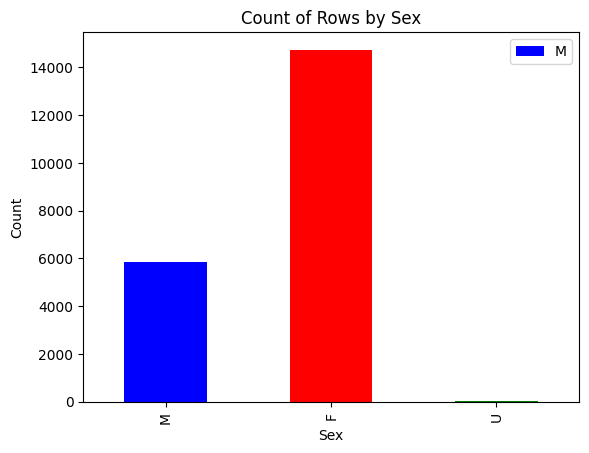

In [14]:
# Count the occurrences of each value in the 'Sex' column
sex_counts = df['Sex'].value_counts()

# Prepare the data for the stacked bar chart
sex_counts_df = sex_counts.reindex(['M', 'F', 'U'], fill_value=0)

import matplotlib.pyplot as plt

# Plot the stacked bar chart
fig, ax = plt.subplots()

sex_counts_df.plot(kind='bar', stacked=True, color=['blue', 'red', 'green'], ax=ax)

# Customize the chart
ax.set_title('Count of Rows by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.legend(['M', 'F', 'U'])

# Show the plot
plt.show()


**Prompt:**

That's solid. Now, we're going to make it more complicated. 

Along the x axis, we're going to use a custom value, "Age Group." Age group will be defined with a bucketing system that takes the value in Age (an integer) and assigns it to a particular group. 

The buckets should be outlined in groups of 10 (0-10, 11-20, etc.)

/var/folders/6z/31gmdp2n1hs7ydk5qj8m18zm0000gn/T/ipykernel_10497/191223654.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_group = df.groupby(['Age Group', 'Sex']).size().unstack(fill_value=0)


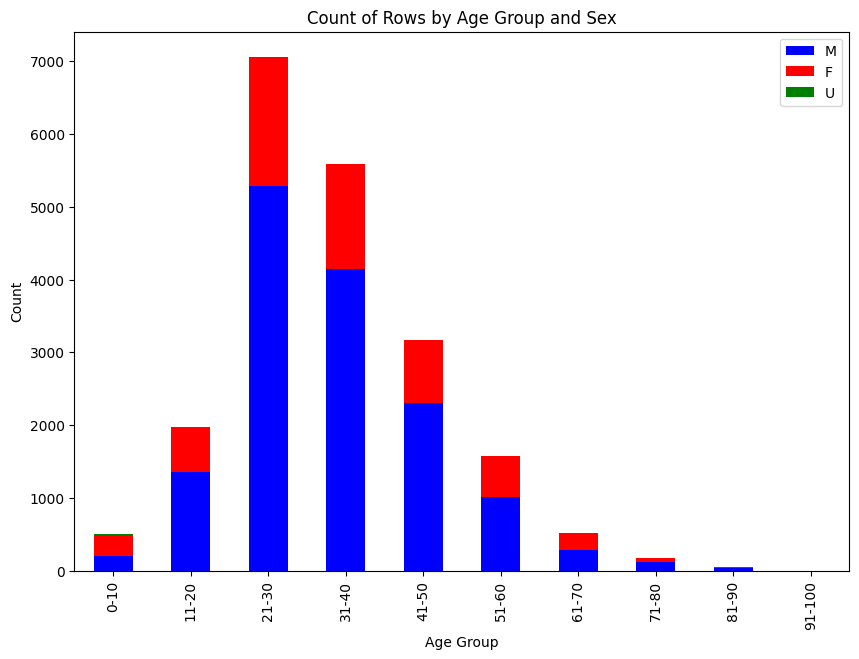

In [15]:
# Define the bins for the age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'Age Group' based on the bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and 'Sex' and count the occurrences
age_sex_group = df.groupby(['Age Group', 'Sex']).size().unstack(fill_value=0)

# Plot the stacked bar chart with Age Groups
fig, ax = plt.subplots(figsize=(10, 7))

age_sex_group.plot(kind='bar', stacked=True, color=['blue', 'red', 'green'], ax=ax)

# Customize the chart
ax.set_title('Count of Rows by Age Group and Sex')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.legend(['M', 'F', 'U'])

# Show the plot
plt.show()


**Prompt:**

Excellent. Please reproduce the same chart, but with an age grouping according to census categories. Those are provided here: 

Under 5 years

5 to 17 years

18 to 24 years

25 to 34 years

35 to 44 years

45 to 64 years

65 to 84 years

85 to 99 years

100 years and older


/var/folders/6z/31gmdp2n1hs7ydk5qj8m18zm0000gn/T/ipykernel_10497/3851545932.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_group_census = df.groupby(['Age Group', 'Sex']).size().unstack(fill_value=0)


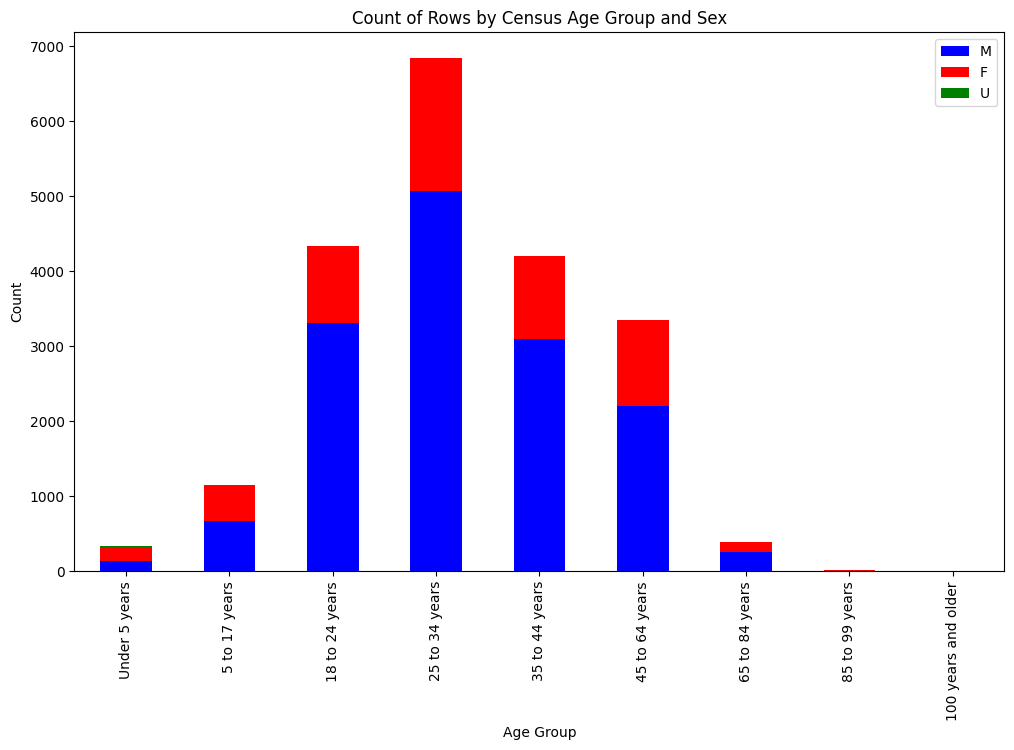

In [5]:
# Define the bins for the census categories
bins = [0, 5, 18, 25, 35, 45, 65, 85, 100, 120]
labels = [
    'Under 5 years',
    '5 to 17 years',
    '18 to 24 years',
    '25 to 34 years',
    '35 to 44 years',
    '45 to 64 years',
    '65 to 84 years',
    '85 to 99 years',
    '100 years and older'
]

# Create a new column 'Age Group' based on the census categories
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and 'Sex' and count the occurrences
age_sex_group_census = df.groupby(['Age Group', 'Sex']).size().unstack(fill_value=0)

# Plot the stacked bar chart with Census Age Groups
fig, ax = plt.subplots(figsize=(12, 7))

age_sex_group_census.plot(kind='bar', stacked=True, color=['blue', 'red', 'green'], ax=ax)

# Customize the chart
ax.set_title('Count of Rows by Census Age Group and Sex')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.legend(['M', 'F', 'U'])

# Show the plot
plt.show()


**Prompt:** 

Awesome. Let's do this one last time, but bring age buckets down to a value of 1. Give me avery age.

/var/folders/6z/31gmdp2n1hs7ydk5qj8m18zm0000gn/T/ipykernel_10497/1107613416.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_group_yearly = df.groupby(['Age Group', 'Sex']).size().unstack(fill_value=0)


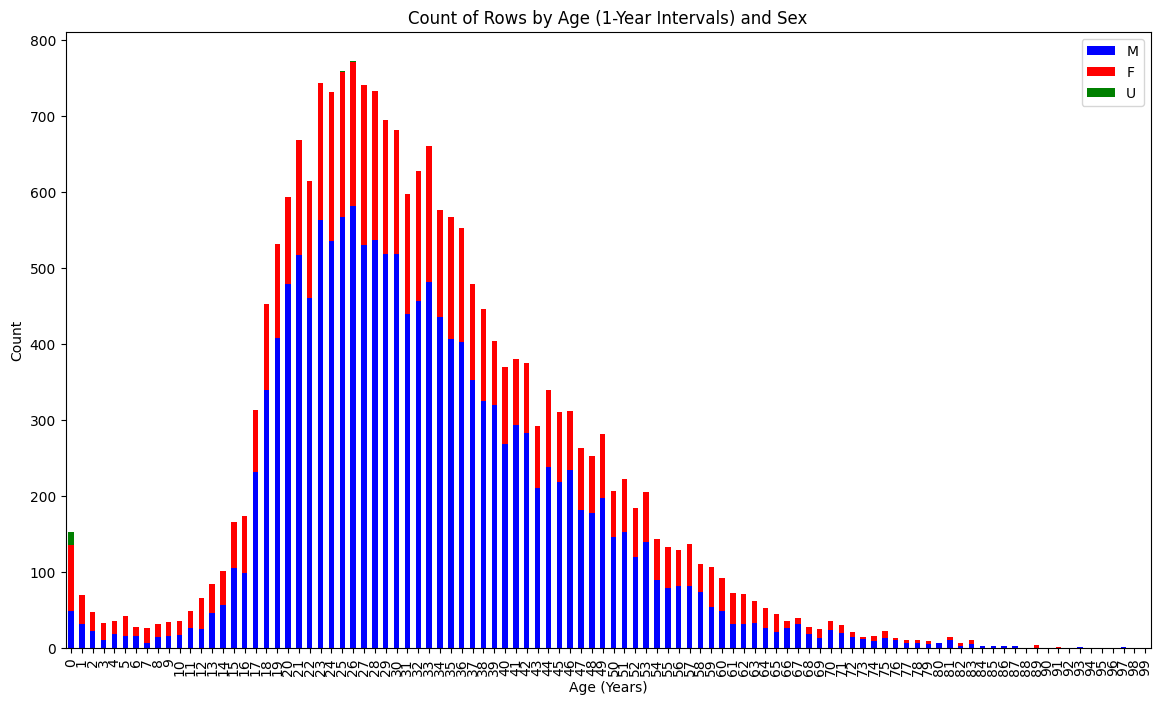

In [6]:
# Define the bins for each individual year (1-year intervals)
bins = list(range(0, 101))  # Bins from 0 to 120
labels = [f'{i}' for i in range(0, 100)]  # Labels for each year

# Create a new column 'Age Group' based on 1-year intervals
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and 'Sex' and count the occurrences
age_sex_group_yearly = df.groupby(['Age Group', 'Sex']).size().unstack(fill_value=0)

# Plot the stacked bar chart with 1-year Age Groups
fig, ax = plt.subplots(figsize=(14, 8))

age_sex_group_yearly.plot(kind='bar', stacked=True, color=['blue', 'red', 'green'], ax=ax)

# Customize the chart
ax.set_title('Count of Rows by Age (1-Year Intervals) and Sex')
ax.set_xlabel('Age (Years)')
ax.set_ylabel('Count')
ax.legend(['M', 'F', 'U'])

# Show the plot
plt.show()


**Notes:**

*Doing this allowed me to determine if the pattern I was seeing, with a trend toward 50-50 gender parity in old age, was accurate*

*It was, and we ended up discussing that at length with the client.*

**Prompt**


Awesome. Let's investigate a new set of relationships between variables. Please clear your memory, we're going to start over. 

**Prompt**


Let's make a stacked bar chart that compares the count of values in the "Sex" column of this table. Make "M" sky blue, "F" pink, and "U" yellow. 

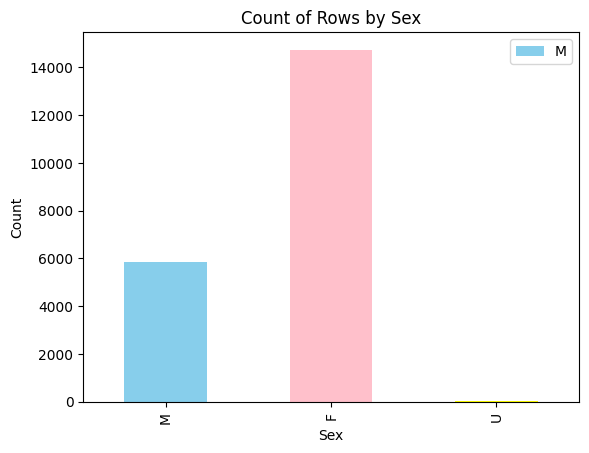

In [8]:
import pandas as pd

file_path = 'PerfectCityPDData.xlsx'
df = pd.read_excel(file_path)

# Count the occurrences of each value in the 'Sex' column
sex_counts = df['Sex'].value_counts()

# Prepare the data for the stacked bar chart
sex_counts_df = sex_counts.reindex(['M', 'F', 'U'], fill_value=0)

import matplotlib.pyplot as plt

# Plot the stacked bar chart
fig, ax = plt.subplots()

sex_counts_df.plot(kind='bar', stacked=True, color=['skyblue', 'pink', 'yellow'], ax=ax)

# Customize the chart
ax.set_title('Count of Rows by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.legend(['M', 'F', 'U'])

# Show the plot
plt.show()


**Prompt**

Great! Now, we're going to add another layer of complexity to this visualization. There are 10 unique values in the Year column. Show me the count for each Sex value across each year. 

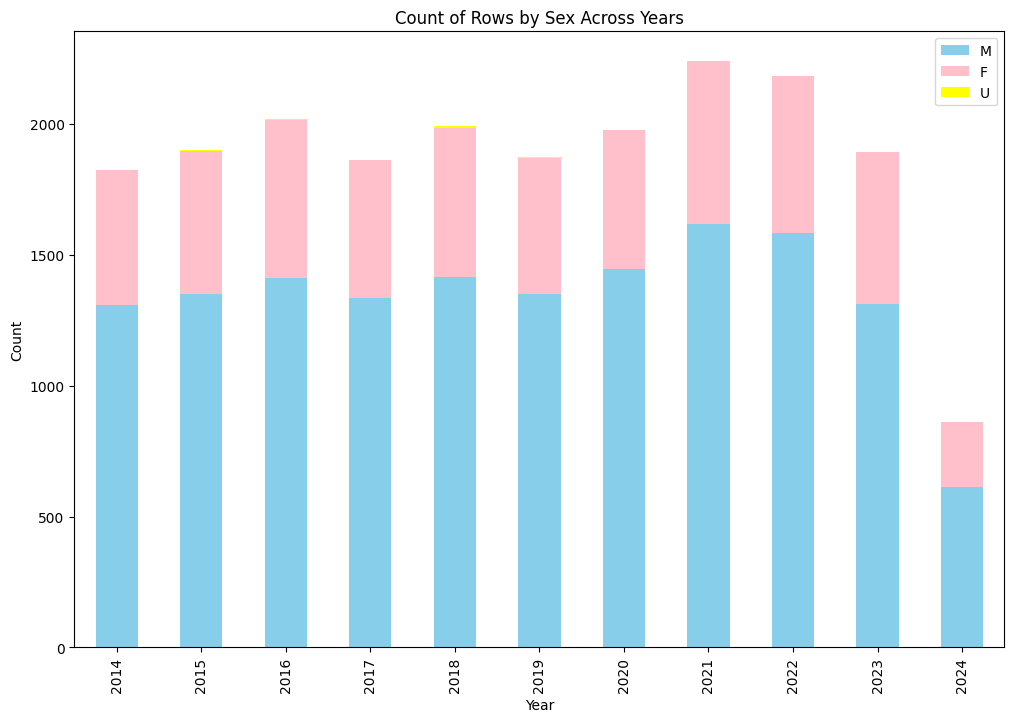

In [9]:
# Group by 'Year' and 'Sex' and count the occurrences
year_sex_group = df.groupby(['Year', 'Sex']).size().unstack(fill_value=0)

# Plot the stacked bar chart with Year on the x-axis
fig, ax = plt.subplots(figsize=(12, 8))

year_sex_group.plot(kind='bar', stacked=True, color=['skyblue', 'pink', 'yellow'], ax=ax)

# Customize the chart
ax.set_title('Count of Rows by Sex Across Years')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend(['M', 'F', 'U'])

# Show the plot
plt.show()


**Prompt:**

Now, we're going to do a trend line chart. The x axis is going to depend on the Year column. We'll have 10 values, between 2014 and 2024.

Show me what that trend line looks like, with a count of the number of rows for each year determining the y axis.

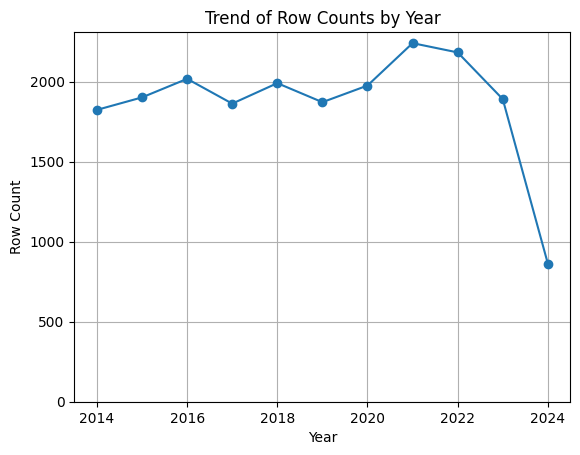

In [16]:
import pandas as pd

# Load the new Excel file
file_path = 'PerfectCityPDData.xlsx'
df = pd.read_excel(file_path)

# Group by 'Year' and count the number of rows for each year
yearly_counts = df['Year'].value_counts().sort_index()

import matplotlib.pyplot as plt

# Plot the trend line chart
fig, ax = plt.subplots()

yearly_counts.plot(kind='line', marker='o', ax=ax)

# Customize the chart
ax.set_ylim(0)  # Set the Y axis to start at 0
ax.set_title('Trend of Row Counts by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Row Count')
ax.grid(True)

# Show the plot
plt.show()


**Prompt:**

Perfect, thank you.

Now we're going to add a layer of complexity. 

We're going to add several trend lines, determined based on segmentation of the "Age" column. Sort age values into 10 year buckets (0-10, 11-20, 21-30, etc.)

Make each line a different color, and display them across years in the same way.

/var/folders/6z/31gmdp2n1hs7ydk5qj8m18zm0000gn/T/ipykernel_10497/2540439158.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_age_group_census_counts = df.groupby(['Year', 'Age Group']).size().unstack(fill_value=0)


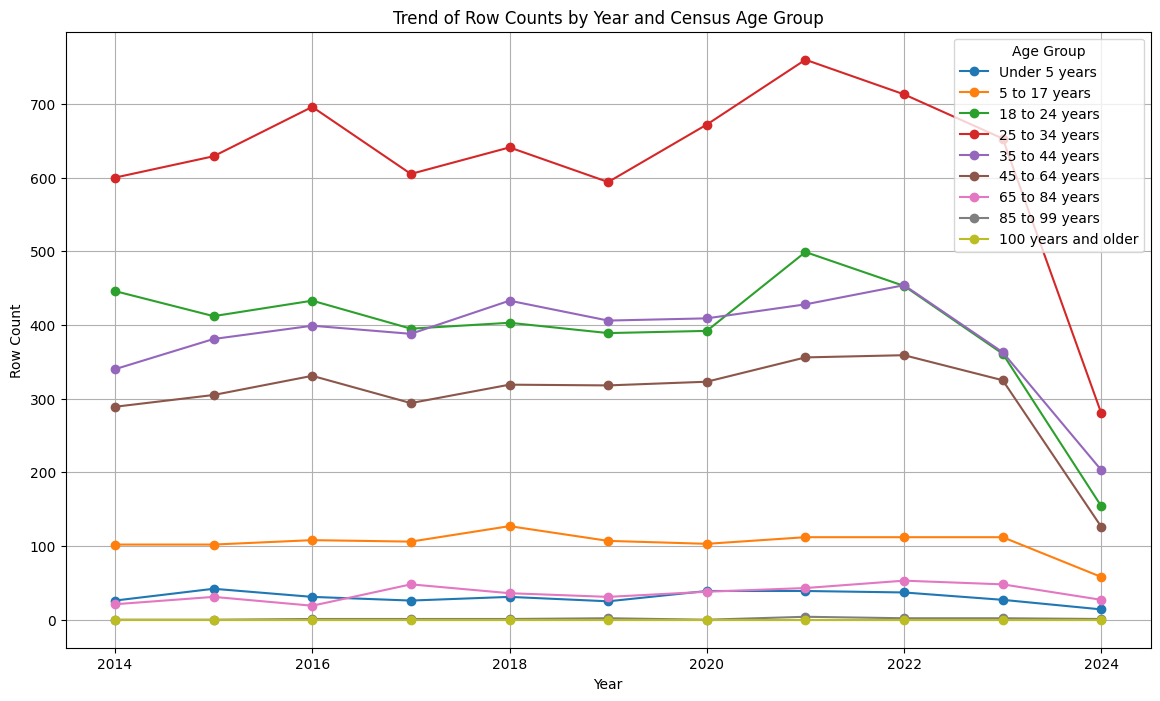

In [13]:
# Define the bins for the census categories
bins = [0, 5, 18, 25, 35, 45, 65, 85, 100, 120]
labels = [
    'Under 5 years',
    '5 to 17 years',
    '18 to 24 years',
    '25 to 34 years',
    '35 to 44 years',
    '45 to 64 years',
    '65 to 84 years',
    '85 to 99 years',
    '100 years and older'
]

# Create a new column 'Age Group' based on the census categories
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by 'Year' and 'Age Group' and count the occurrences
year_age_group_census_counts = df.groupby(['Year', 'Age Group']).size().unstack(fill_value=0)

# Plot the trend lines for each census age group
fig, ax = plt.subplots(figsize=(14, 8))

year_age_group_census_counts.plot(kind='line', marker='o', ax=ax)

# Customize the chart
ax.set_title('Trend of Row Counts by Year and Census Age Group')
ax.set_xlabel('Year')
ax.set_ylabel('Row Count')
ax.grid(True)
ax.legend(title='Age Group')

# Show the plot
plt.show()


This chart allowed me to analyze whether or not certain age groups were more affected by the pandemic. We found younger adults were, compared to older age groups.